Codigo para interpretar las prediciones de los proximos 90 dias del Dolar Blue & Dolar Oficial, generar un comparativo entre ambos y analizar la brecha porcentual

In [1]:
import pandas as pd

of = pd.read_excel('data/xlsx/values_newOf.xlsx')
bl = pd.read_excel('data/xlsx/values_newBlue.xlsx')

print(of)
print(bl)

   Unnamed: 0      Values
0  2023-01-25  192.169571
1  2023-01-26  192.445883
2  2023-01-27  192.771350
3  2023-01-28  193.163716
4  2023-01-29  193.567034
..        ...         ...
86 2023-04-21  219.608110
87 2023-04-22  219.996055
88 2023-04-23  220.334859
89 2023-04-24  220.603566
90 2023-04-25  220.842371

[91 rows x 2 columns]
   Unnamed: 0      Values
0  2023-01-25  383.009680
1  2023-01-26  382.424255
2  2023-01-27  384.098123
3  2023-01-28  384.283372
4  2023-01-29  380.111616
..        ...         ...
86 2023-04-21  375.136645
87 2023-04-22  376.017459
88 2023-04-23  378.979720
89 2023-04-24  380.902105
90 2023-04-25  380.556652

[91 rows x 2 columns]


In [2]:
merged_df = pd.merge(of, bl, on='Unnamed: 0')

merged_df.to_pickle('data/pkl/merged_brecha.xls.pkl')

print(merged_df)

   Unnamed: 0    Values_x    Values_y
0  2023-01-25  192.169571  383.009680
1  2023-01-26  192.445883  382.424255
2  2023-01-27  192.771350  384.098123
3  2023-01-28  193.163716  384.283372
4  2023-01-29  193.567034  380.111616
..        ...         ...         ...
86 2023-04-21  219.608110  375.136645
87 2023-04-22  219.996055  376.017459
88 2023-04-23  220.334859  378.979720
89 2023-04-24  220.603566  380.902105
90 2023-04-25  220.842371  380.556652

[91 rows x 3 columns]


In [3]:
df = merged_df.rename(columns={'Unnamed: 0': 'Fecha', 'Values_x': 'Dolar Oficial', 'Values_y': 'Dolar Blue'})
df

,Fecha,Dolar Oficial,Dolar Blue
0,2023-01-25,192.169571,383.009680
1,2023-01-26,192.445883,382.424255
2,2023-01-27,192.771350,384.098123
3,2023-01-28,193.163716,384.283372
4,2023-01-29,193.567034,380.111616
...,...,...,...
86,2023-04-21,219.608110,375.136645
87,2023-04-22,219.996055,376.017459
88,2023-04-23,220.334859,378.979720
89,2023-04-24,220.603566,380.902105


In [4]:
df["Fecha"] = pd.to_datetime(df["Fecha"])

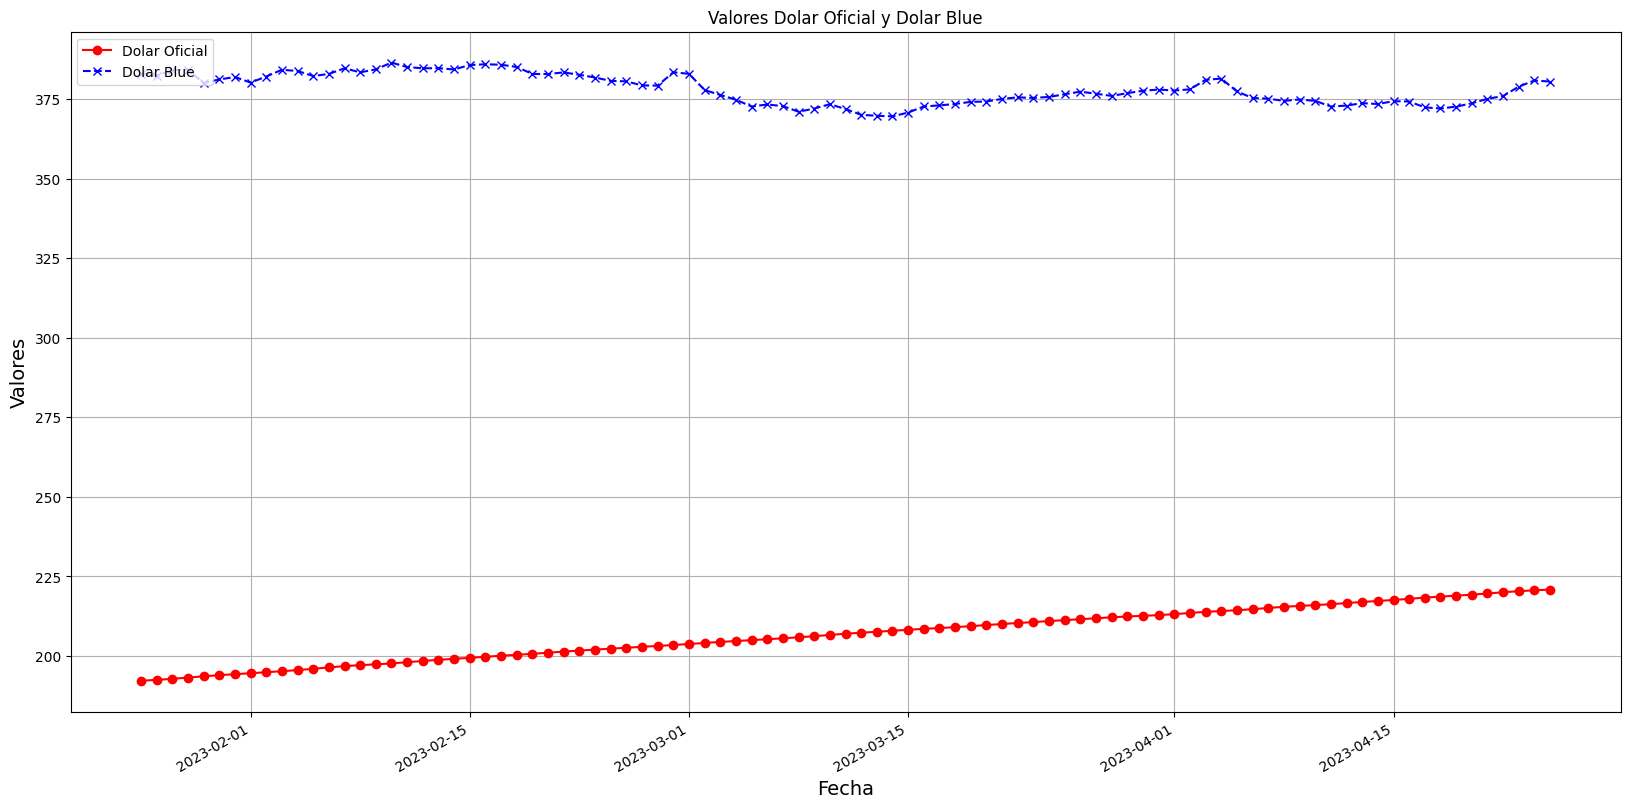

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# create the plot
plt.figure(figsize=(20,10))
plt.plot(df["Fecha"], df["Dolar Oficial"], 'r', marker='o', linestyle='-', label='Dolar Oficial')
plt.plot(df["Fecha"], df["Dolar Blue"], 'b', marker='x', linestyle='--', label='Dolar Blue')

#set x axis as date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

# add labels, title and legend
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.title("Valores Dolar Oficial y Dolar Blue")
plt.legend(loc="upper left")

# add gridlines
plt.grid(True)

# change the style of the plot
plt.style.use('ggplot')

# show the plot
plt.show()


In [6]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Create the trace for Dolar Oficial
trace1 = go.Scatter(x=df["Fecha"], y=df["Dolar Oficial"], mode='lines+markers', name='Dolar Oficial')

# Create the trace for Dolar Blue
trace2 = go.Scatter(x=df["Fecha"], y=df["Dolar Blue"], mode='lines+markers', name='Dolar Blue')

# Create the data array
data = [trace1, trace2]

# Define the layout of the chart
layout = go.Layout(title='Valores Dolar Oficial y Dolar Blue', xaxis=dict(title='Fecha'), yaxis=dict(title='Valores'))

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the chart
pyo.iplot(fig)


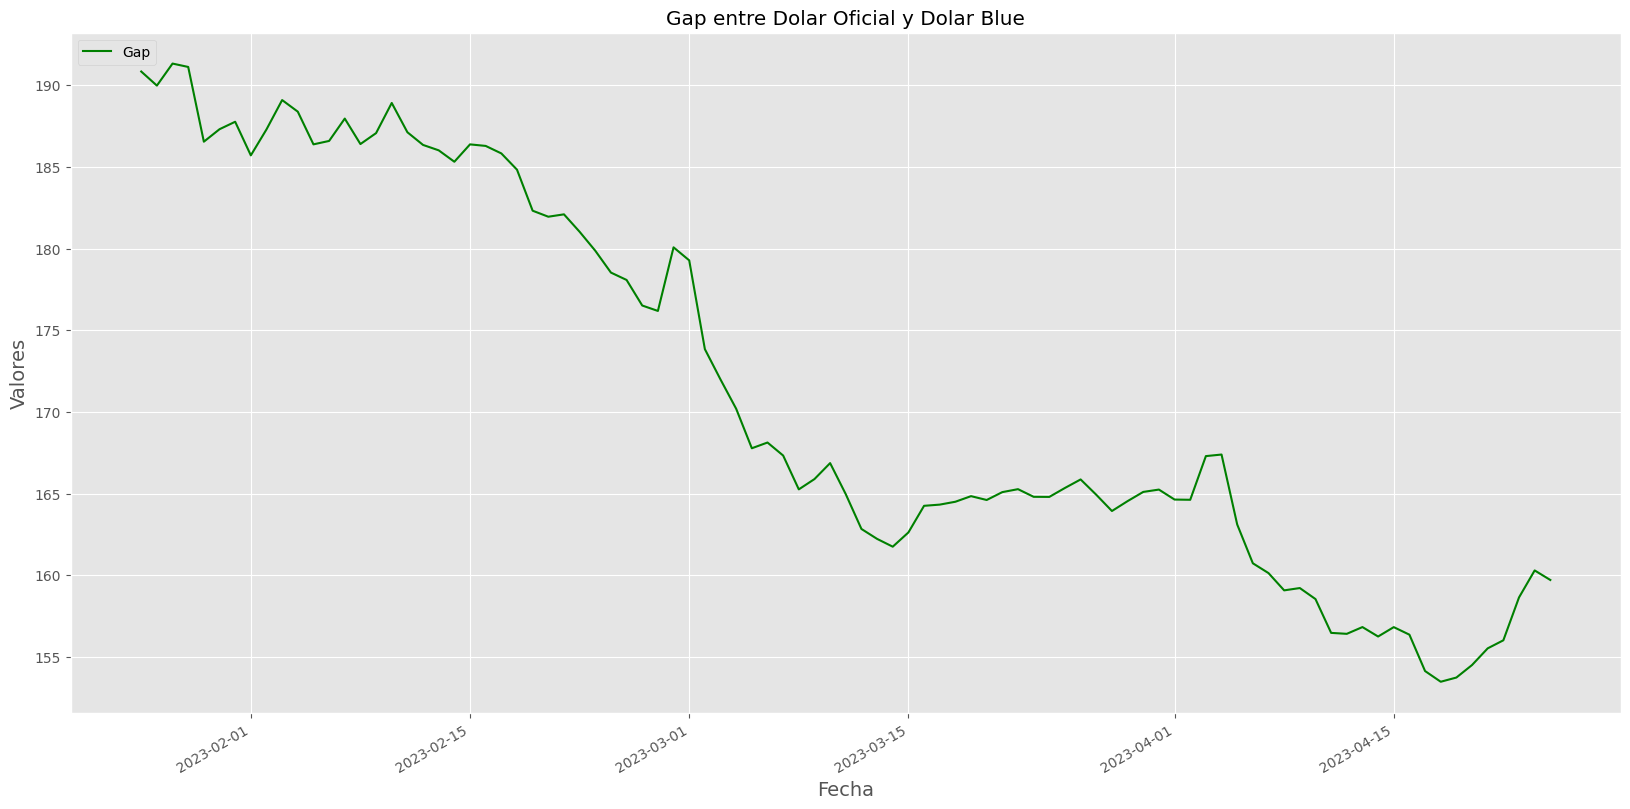

In [7]:
# calculate the gap
df["gap"] = df["Dolar Blue"] - df["Dolar Oficial"]

# create the plot
plt.figure(figsize=(20,10))
plt.plot(df["Fecha"], df["gap"], 'g', linestyle='-', label='Gap')

#set x axis as date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

# add labels, title and legend
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.title("Gap entre Dolar Oficial y Dolar Blue")
plt.legend(loc="upper left")

# add gridlines
plt.grid(True)

# change the style of the plot
plt.style.use('ggplot')

# show the plot
plt.show()

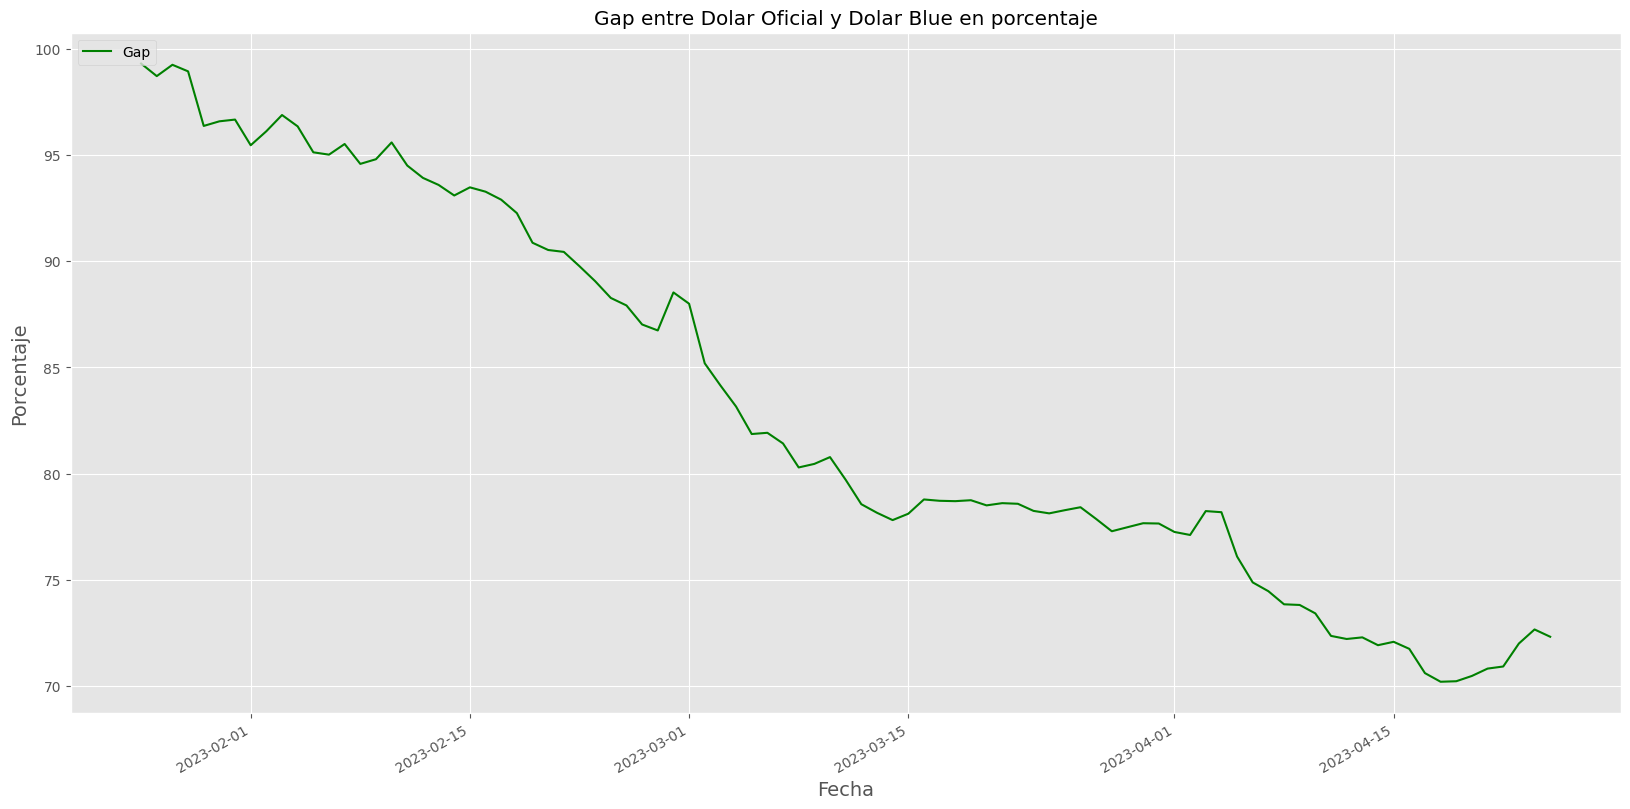

In [8]:
# calculate the gap in percentage
df["gap"] = ((df["Dolar Blue"] - df["Dolar Oficial"]) / df["Dolar Oficial"]) * 100

# create the plot
plt.figure(figsize=(20,10))
plt.plot(df["Fecha"], df["gap"], 'g', linestyle='-', label='Gap')

#set x axis as date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

# add labels, title and legend
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.title("Gap entre Dolar Oficial y Dolar Blue en porcentaje")
plt.legend(loc="upper left")

# add gridlines
plt.grid(True)

# change the style of the plot
plt.style.use('ggplot')

# show the plot
plt.show()

In [9]:
import plotly.graph_objs as go
import plotly.offline as pyo

# calculate the gap in percentage
df["gap"] = ((df["Dolar Blue"] - df["Dolar Oficial"]) / df["Dolar Oficial"]) * 100

# Create the trace for Dolar Oficial
trace1 = go.Scatter(x=df["Fecha"], y=df["Dolar Oficial"], mode='lines+markers', name='Dolar Oficial')

# Create the trace for Dolar Blue
trace2 = go.Scatter(x=df["Fecha"], y=df["Dolar Blue"], mode='lines+markers', name='Dolar Blue')

# Create the trace for Gap
trace3 = go.Scatter(x=df["Fecha"], y=df["gap"], mode='lines+markers', name='Brecha en porcentaje')

# Create the data array
data = [trace1, trace2, trace3]

# Define the layout of the chart
layout = go.Layout(title='Predicciones Dolar Oficial y Dolar Blue con su Brecha en porcentaje', xaxis=dict(title='Fecha'), yaxis=dict(title='Valores'))

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the chart
pyo.iplot(fig)


In [10]:
with open('data/html/Predicciones/Pred_Brecha.html', 'w') as f:
    f.write(fig.to_html(include_plotlyjs='cdn'))